In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold

fashion MNIST를 읽고 신경망에 입력할 형태로 변환

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

4431872/4422102 [==============================] - 0s 0us/step


신경망 구조 설정

In [ ]:
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_hidden5 = 512
n_output = 10 

하이퍼매개변수 설정

In [ ]:
batch_siz = 512
n_epoch = 30
k=5

모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(units = n_hidden1, activation = 'relu', input_shape=(n_input,)))
  model.add(Dense(units = n_hidden2, activation = 'relu'))
  model.add(Dense(units = n_hidden3, activation = 'relu'))
  model.add(Dense(units = n_hidden4, activation = 'relu'))
  model.add(Dense(units = n_hidden5, activation = 'relu'))
  model.add(Dense(units = n_output, activation = 'softmax'))
  return model

교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)

In [ ]:
def cross_validation(opt):
  accuracy = []
  for train_index, val_index in KFold(k).split(x_train):
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]
    dmlp = build_model()
    dmlp.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
    dmlp.fit(xtrain, ytrain, batch_size=batch_siz, epochs=n_epoch, verbose=0)
    accuracy.append(dmlp.evaluate(xval, yval, verbose=0)[1])
  return accuracy

옵티마이저 4개에 대해 교차 검증을 실행

In [ ]:
import time

In [ ]:
start = time.time()
acc_sgd=cross_validation(SGD())
end = time.time()
print("SGD 최적화에 걸린 시간은",end-start,"초입니다.")

SGD 최적화에 걸린 시간은 101.34848737716675 초입니다.


In [ ]:
start = time.time()
acc_adam=cross_validation(Adam())
end = time.time()
print("Adam 최적화에 걸린 시간은",end-start,"초입니다.")

Adam 최적화에 걸린 시간은 97.51006603240967 초입니다.


In [ ]:
start = time.time()
acc_adagrad = cross_validation(Adagrad())
end = time.time()
print("Adagrad 최적화에 걸린 시간은",end-start,"초입니다.")

Adagrad 최적화에 걸린 시간은 102.64751100540161 초입니다.


In [ ]:
start = time.time()
acc_rmsprop = cross_validation(RMSprop())
end = time.time()
print("RMSprop 최적화에 걸린 시간은",end-start,"초입니다.")

RMSprop 최적화에 걸린 시간은 176.52087998390198 초입니다.


옵티마이저 4개의 정확률을 비교

In [ ]:
print("SGD:", np.array(acc_sgd).mean())
print("Adam:", np.array(acc_adam).mean())
print("Adagrad:", np.array(acc_adagrad).mean())
print("RMSprop:", np.array(acc_rmsprop).mean())

SGD: 0.8568166613578796
Adam: 0.8957000017166138
Adagrad: 0.824216651916504
RMSprop: 0.8939833402633667


네 옵티마이저의 정확률을 박스플롯으로 비교

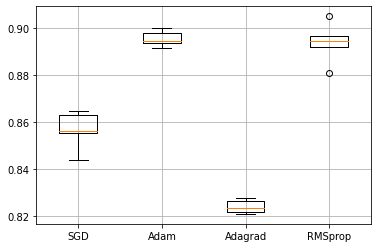

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([acc_sgd, acc_adam, acc_adagrad, acc_rmsprop], labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()